<a href="https://colab.research.google.com/github/AmiraBelkis/Neural-Network-Reduction-via-Knowledge-Transfer/blob/main/MNIST/AG_GoogLeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rssrc

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug  8 11:27:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Importer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bibliothèques

In [ ]:
import random
import string
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.colors as colors
import numpy as np
from copy import deepcopy

In [ ]:
import AG

100%|██████████| 9912422/9912422 [00:00<00:00, 103387704.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38987992.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26003697.56it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4930261.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import importlib
import global_param
importlib.reload(global_param)
importlib.reload(AG)

<module 'AG' from '/content/AG.py'>

# AG

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/MNIST/googlenet_mnist'
model_base = torch.load(model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 88.22%
Loss: 0.6091


(0.8822, 0.6091333995958802)

## Méthode AG

In [ ]:
save_to = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/MNIST/GoogLeNet/'
os.makedirs(save_to, exist_ok=True)
os.makedirs(save_to +'children/', exist_ok=True)
os.makedirs(save_to +'parents/', exist_ok=True)
os.makedirs(save_to +'kd/', exist_ok=True)
os.makedirs(save_to +'kd/training/', exist_ok=True)

Generating the initial population :
     - individual 0 ----------- 100%
     - individual 1 ----------- 100%
     - individual 2 ----------- 100%
     - individual 3 ----------- 100%
     - individual 4 ----------- 100%
     - individual 5 ----------- 100%
     - individual 6 ----------- 100%
     - individual 7 ----------- 100%
Performing KD on the initial population :
------------------------------ Training 1 ---------------------------------
Epoch 0/4
----------
train Loss: 0.9293 Acc: 0.1144
val Loss: 0.9234 Acc: 0.1340

Epoch 1/4
----------
train Loss: 0.9181 Acc: 0.1413
val Loss: 0.9153 Acc: 0.1487

Epoch 2/4
----------
train Loss: 0.9136 Acc: 0.1588
val Loss: 0.9096 Acc: 0.1826

Epoch 3/4
----------
train Loss: 0.9112 Acc: 0.1703
val Loss: 0.9070 Acc: 0.1764

Epoch 4/4
----------
train Loss: 0.9088 Acc: 0.1756
val Loss: 0.9033 Acc: 0.1881

Training complete in 21m 9s
Best val Acc: 0.188100
------------------------------ Training 2 ---------------------------------
Epoch 0/4
---

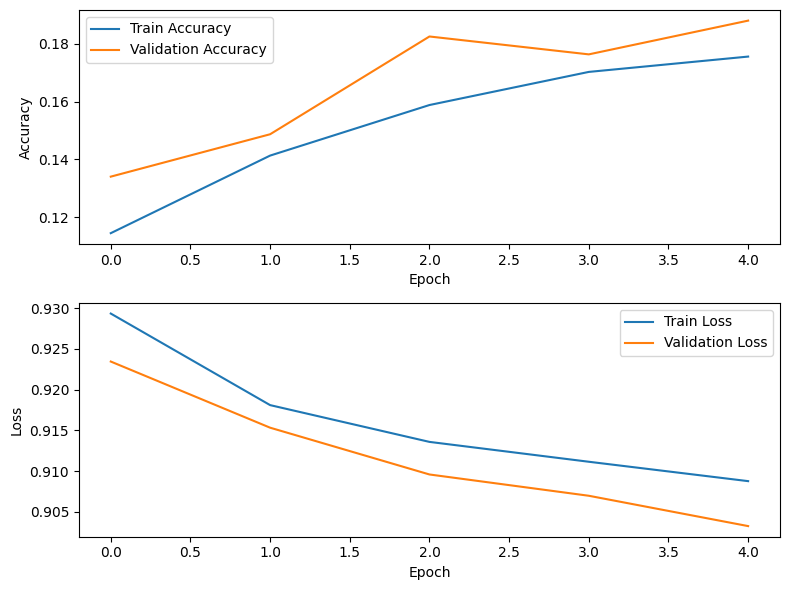

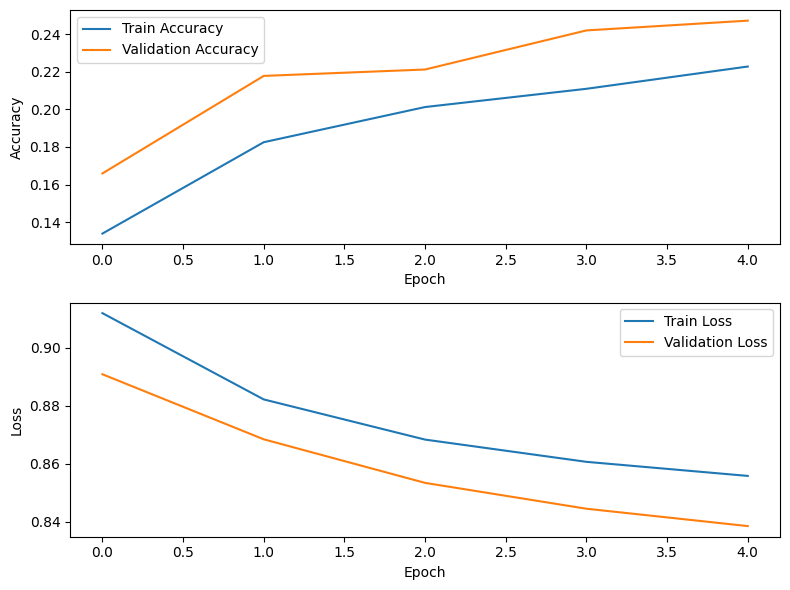

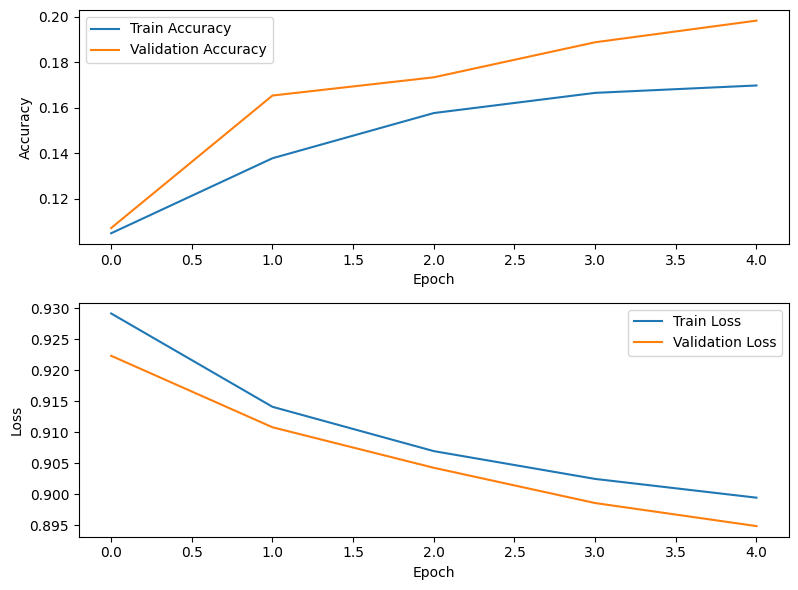

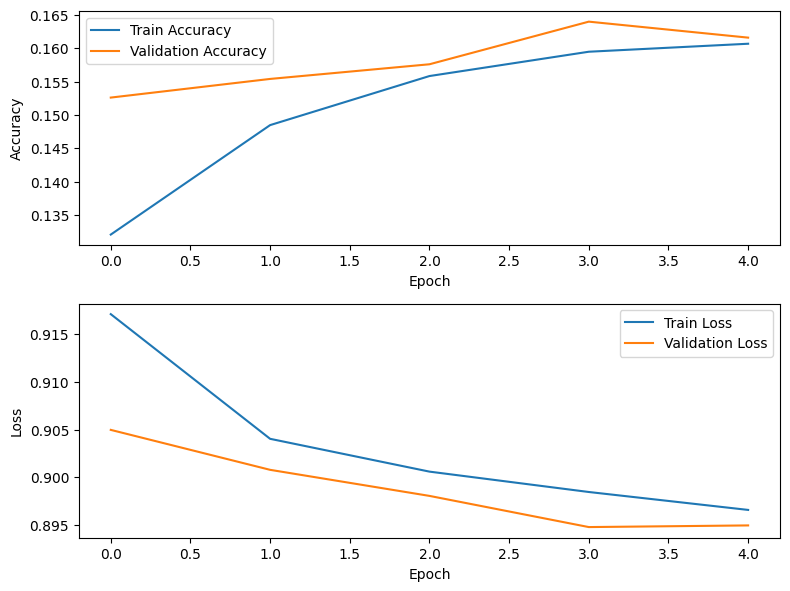

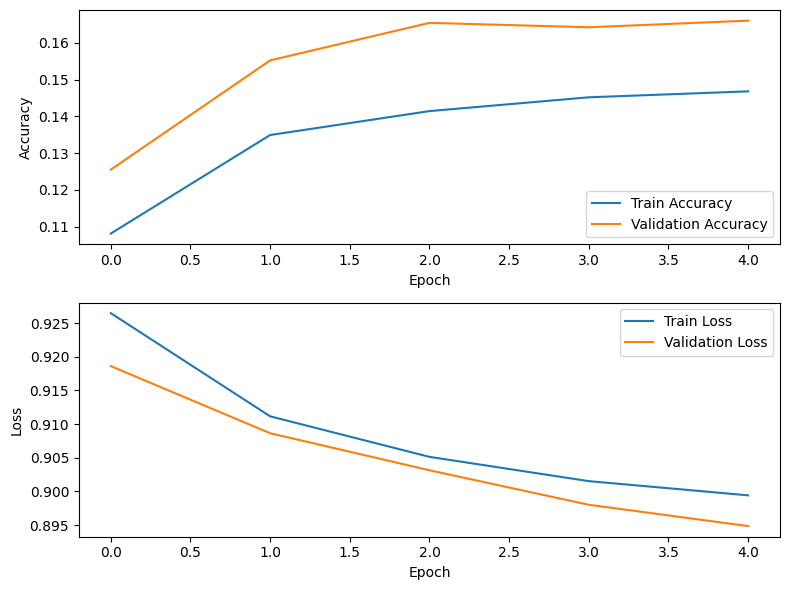

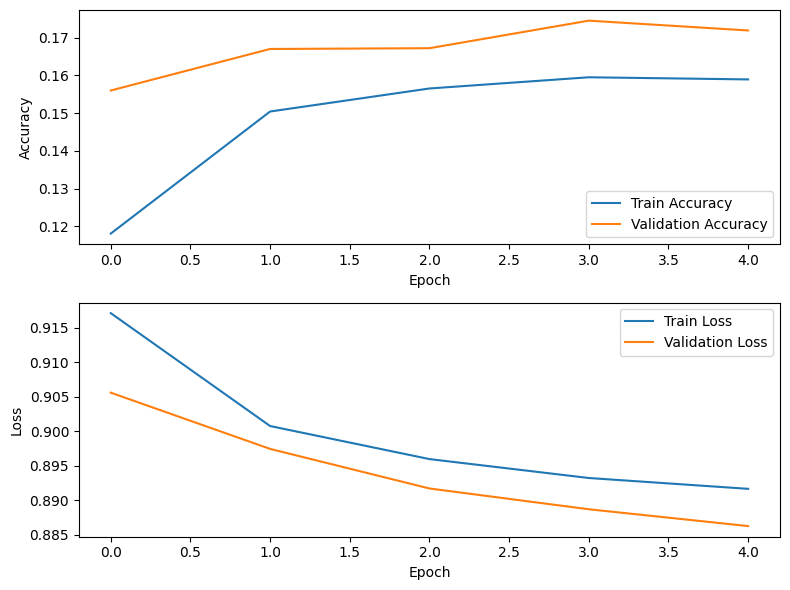

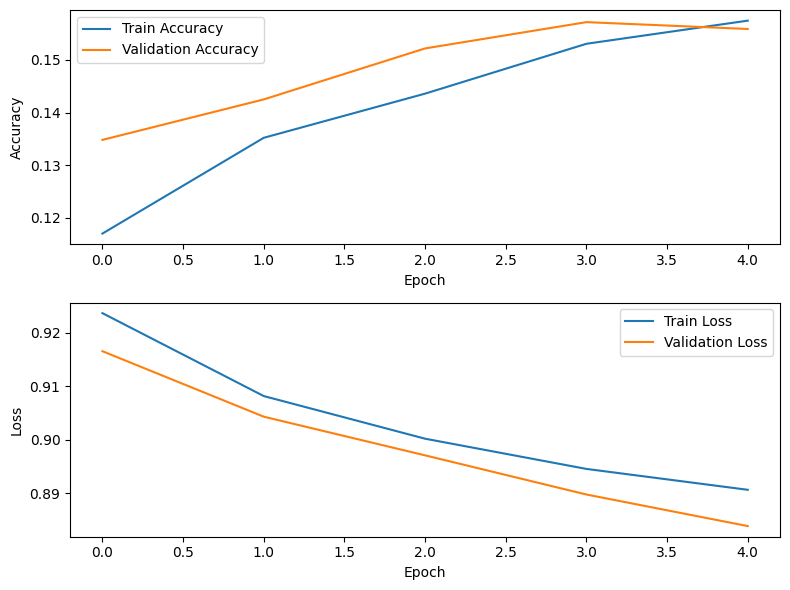

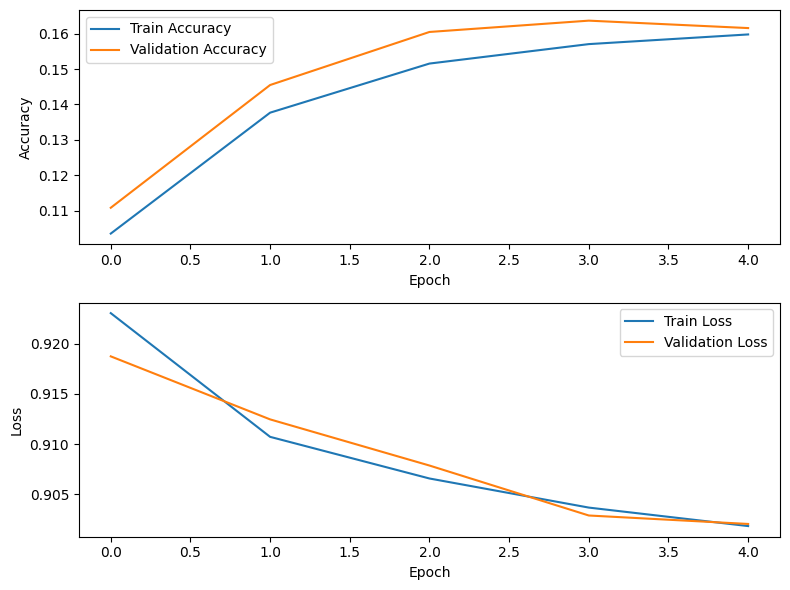

/*-----------------------------*/
/*         iteration 1        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]
       - Crossover:
           mask : [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
       - Performing KD on the children :
--

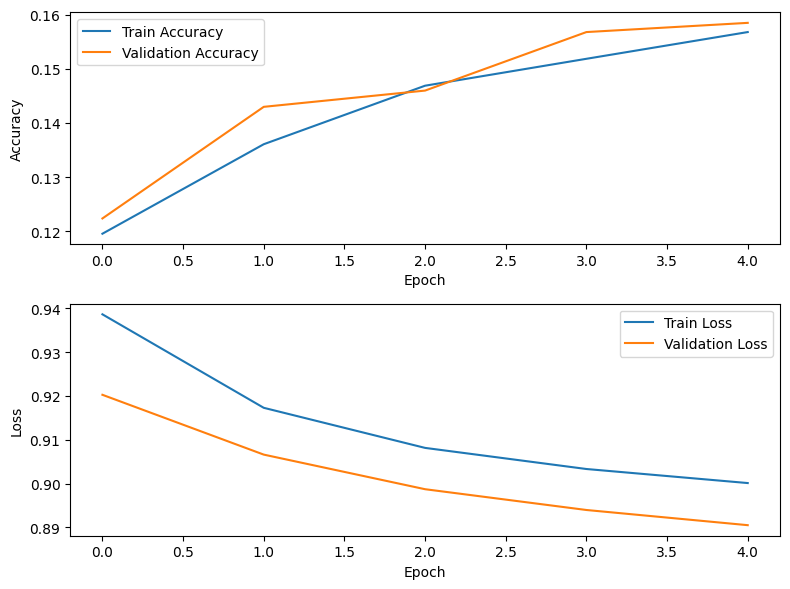

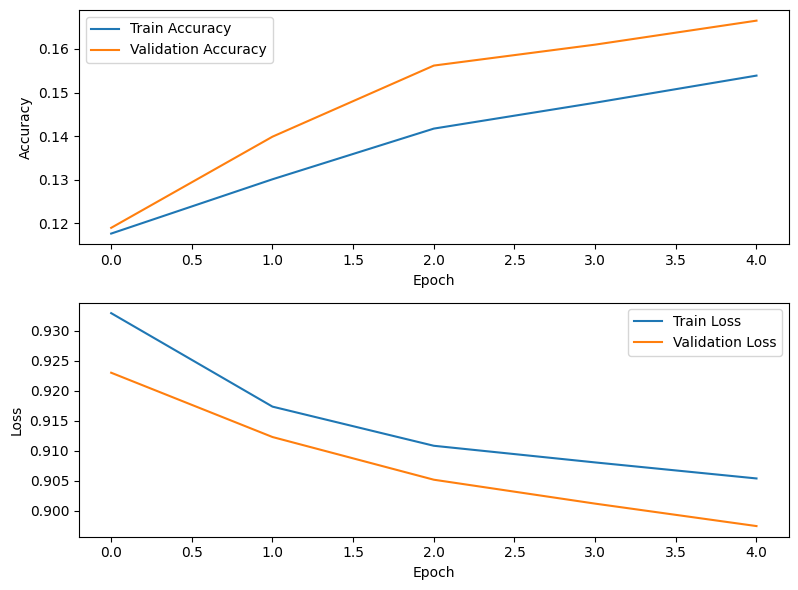

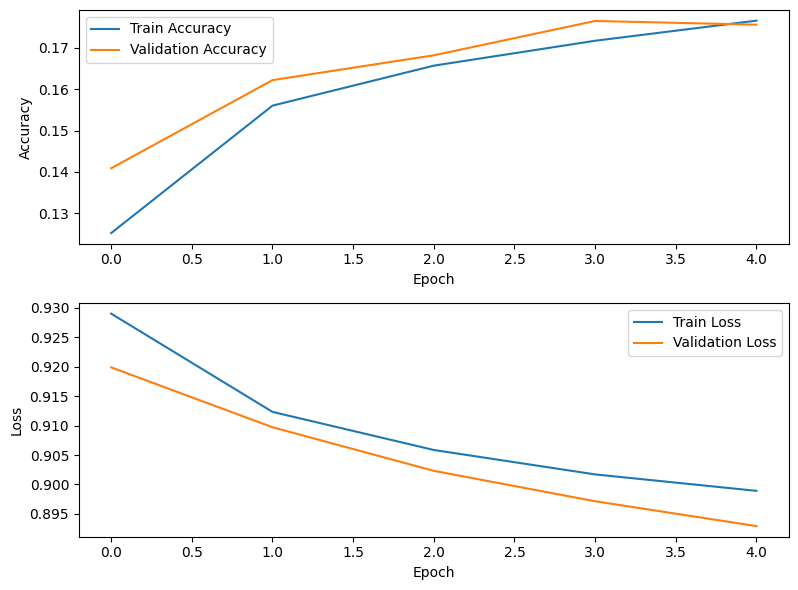

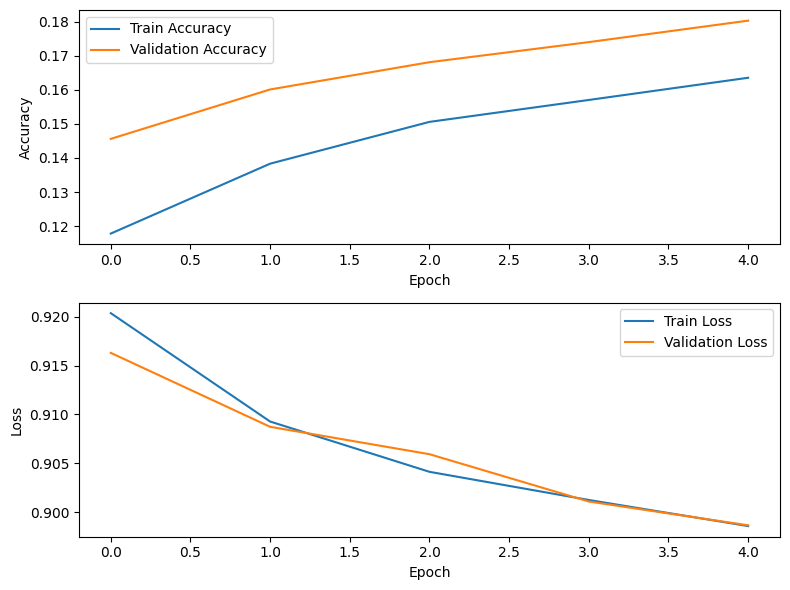

/*-----------------------------*/
/*         iteration 2        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
       - Crossover:
           mask : [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
       - Performing KD on the children :
--

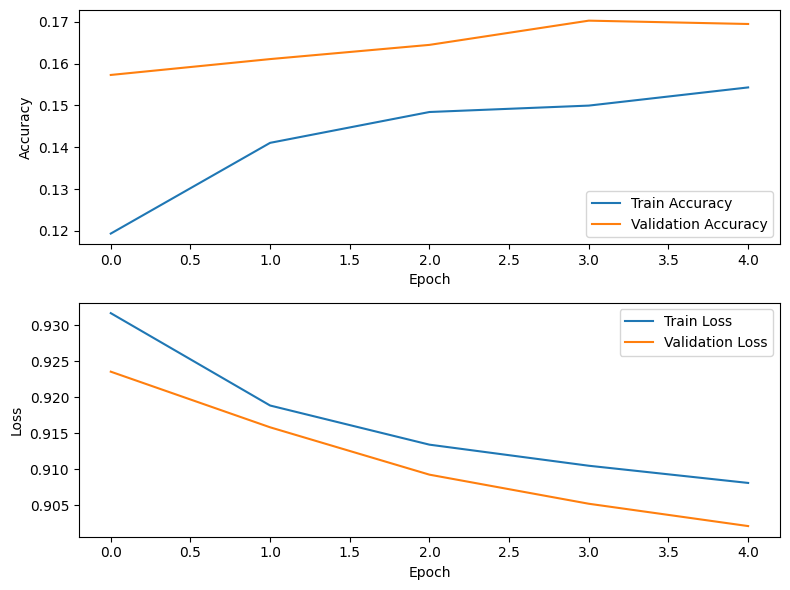

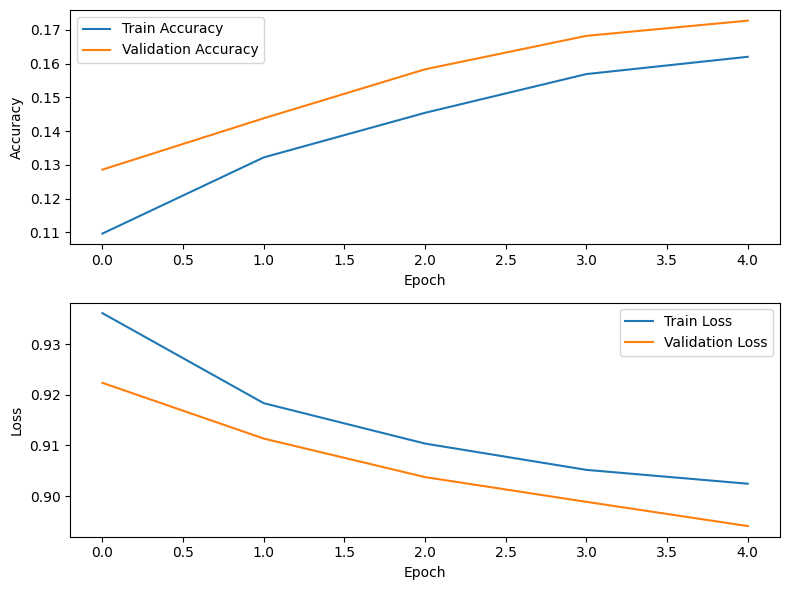

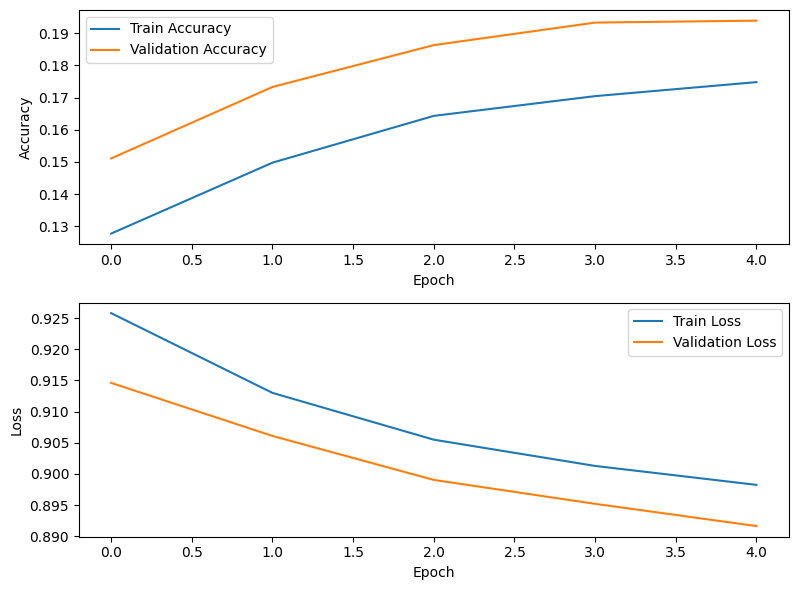

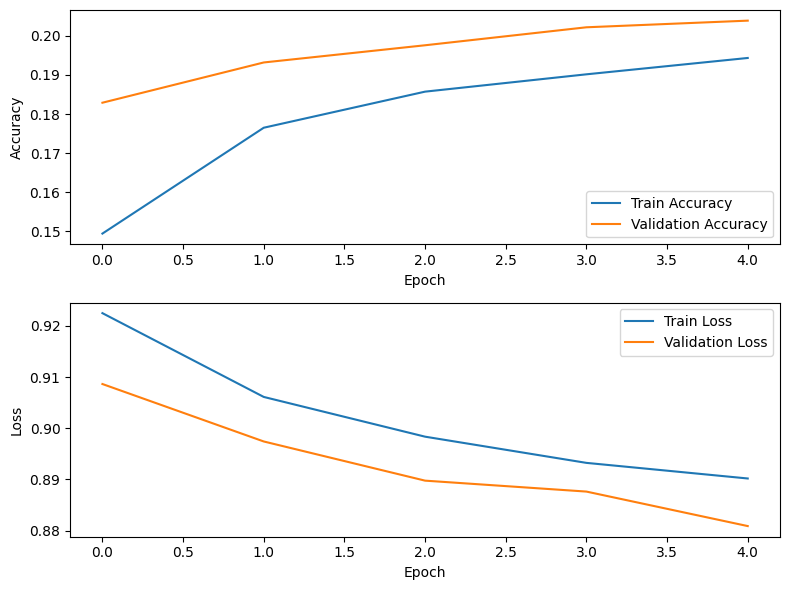

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_method(model_base, save_to, nb_itr = 2, N = 8 ,pruning_rate = 0.85, pruning_space = 0.05,kd_epoch = 5)

## Évaluer le ticket gagnant

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8436, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 24.72%
Loss: 2.0973


(0.2472, 2.0973018833026766)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

tensor([2, 2, 7, 2, 7, 3, 7, 7, 2, 9, 2, 9, 7, 3, 2, 9, 4, 6, 3, 3, 2, 2, 2, 9,
        9, 8, 7, 2, 9, 2, 2, 2, 7, 2, 4, 2, 2, 9, 7, 2, 9, 7, 7, 3, 2, 7, 2, 2,
        9, 3, 2, 9, 9, 3, 2, 7, 7, 9, 9, 4, 9, 3, 9, 3], device='cuda:0')
----------
tensor([3, 0, 1, 6, 9, 0, 4, 7, 0, 9, 4, 9, 6, 2, 5, 6, 1, 6, 3, 3, 0, 0, 2, 4,
        9, 8, 4, 0, 6, 2, 5, 0, 1, 8, 4, 3, 0, 4, 5, 0, 9, 1, 4, 3, 4, 7, 3, 2,
        0, 2, 0, 6, 0, 8, 1, 1, 2, 8, 9, 1, 9, 5, 9, 5], device='cuda:0')
----------
tensor([-1,  2,  6, -4, -2,  3,  3,  0,  2,  0, -2,  0,  1,  1, -3,  3,  3,  0,
         0,  0,  2,  2,  0,  5,  0,  0,  3,  2,  3,  0, -3,  2,  6, -6,  0, -1,
         2,  5,  2,  2,  0,  6,  3,  0, -2,  0, -1,  0,  9,  1,  2,  3,  9, -5,
         1,  6,  5,  1,  0,  3,  0, -2,  0, -2], device='cuda:0')


## Effectuer la distillation des connaissances pendant des epochs supplémentaires

------------------------------ Training ---------------------------------
Epoch 0/14
----------
train Loss: 0.8522 Acc: 0.2298
val Loss: 0.8307 Acc: 0.2581

Epoch 1/14
----------
train Loss: 0.8499 Acc: 0.2368
val Loss: 0.8278 Acc: 0.2718

Epoch 2/14
----------
train Loss: 0.8479 Acc: 0.2438
val Loss: 0.8240 Acc: 0.2800

Epoch 3/14
----------
train Loss: 0.8459 Acc: 0.2481
val Loss: 0.8215 Acc: 0.2735

Epoch 4/14
----------
train Loss: 0.8460 Acc: 0.2486
val Loss: 0.8186 Acc: 0.2779

Epoch 5/14
----------
train Loss: 0.8438 Acc: 0.2550
val Loss: 0.8161 Acc: 0.2854

Epoch 6/14
----------
train Loss: 0.8443 Acc: 0.2567
val Loss: 0.8159 Acc: 0.2835

Epoch 7/14
----------
train Loss: 0.8442 Acc: 0.2558
val Loss: 0.8153 Acc: 0.2827

Epoch 8/14
----------
train Loss: 0.8428 Acc: 0.2568
val Loss: 0.8145 Acc: 0.2856

Epoch 9/14
----------
train Loss: 0.8443 Acc: 0.2544
val Loss: 0.8162 Acc: 0.2831

Epoch 10/14
----------
train Loss: 0.8438 Acc: 0.2584
val Loss: 0.8158 Acc: 0.2866

Epoch 11/14


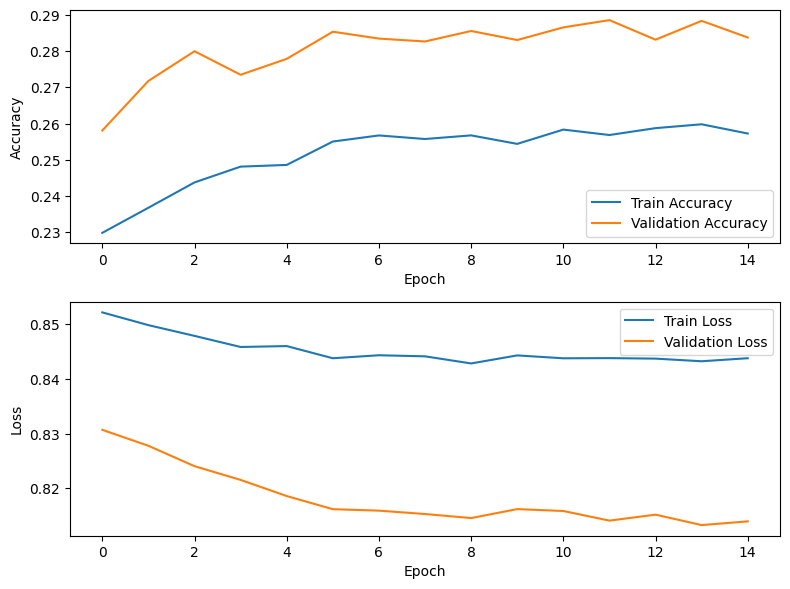

In [ ]:
import global_param
criterion = AG.SoftHardTargetLoss(global_param.soft_citerion,global_param.hard_citerion, global_param.soft_purcntg, global_param.hard_purcntg)

optimizer_conv = global_param.Optimizer(winning_ticket)

exp_lr_scheduler = global_param.Scheduler(optimizer_conv)
print("------------------------------ Training ---------------------------------")
# Train the model
winning_ticket, statics = AG.train_model_kd_mix(winning_ticket,model_base, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=15)
AG.show_statics_training(statics, save_to + 'winning_ticket')
torch.save(winning_ticket, save_to + 'winning_ticket')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 28.86%
Loss: 2.0223


(0.2886, 2.0222769823803266)

## Affinage et itérations supplémentaires
Affiner le modèle de base pour effectuer des itérations supplémentaires de "AG"

### Affinage

In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/MNIST/googlenet_mnist'
model_base = torch.load(model_path)

In [ ]:
from global_param import *

def train_model(model, criterion, optimizer, scheduler , num_epochs=7):
    since = time.time()
    model = model.to(device)
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    statics = []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            statics.append(
                {'epoch': epoch+1, 'phase': phase, 'acc': epoch_acc, 'loss': epoch_loss}
            )
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, statics

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_conv  =  optim.SGD(model_base.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=5, gamma=0.1)
model_base , statics = train_model(model_base, criterion , optimizer_conv , exp_lr_scheduler , 7)

Epoch 0/6
----------
train Loss: 0.5629 Acc: 0.8705
val Loss: 0.4388 Acc: 0.9047

Epoch 1/6
----------
train Loss: 0.4558 Acc: 0.8877
val Loss: 0.3739 Acc: 0.9138

Epoch 2/6
----------
train Loss: 0.3997 Acc: 0.8979
val Loss: 0.3301 Acc: 0.9221

Epoch 3/6
----------
train Loss: 0.3671 Acc: 0.9032
val Loss: 0.3006 Acc: 0.9272

Epoch 4/6
----------
train Loss: 0.3453 Acc: 0.9076
val Loss: 0.2838 Acc: 0.9303

Epoch 5/6
----------
train Loss: 0.3336 Acc: 0.9096
val Loss: 0.2811 Acc: 0.9300

Epoch 6/6
----------
train Loss: 0.3302 Acc: 0.9110
val Loss: 0.2784 Acc: 0.9314

Training complete in 20m 54s
Best val Acc: 0.931400


In [ ]:
model_path = '/content/drive/Shareddrives/PFE 22 23 Feliachi et Frioui/..Tests/Models/MNIST/googlenet_mnist'

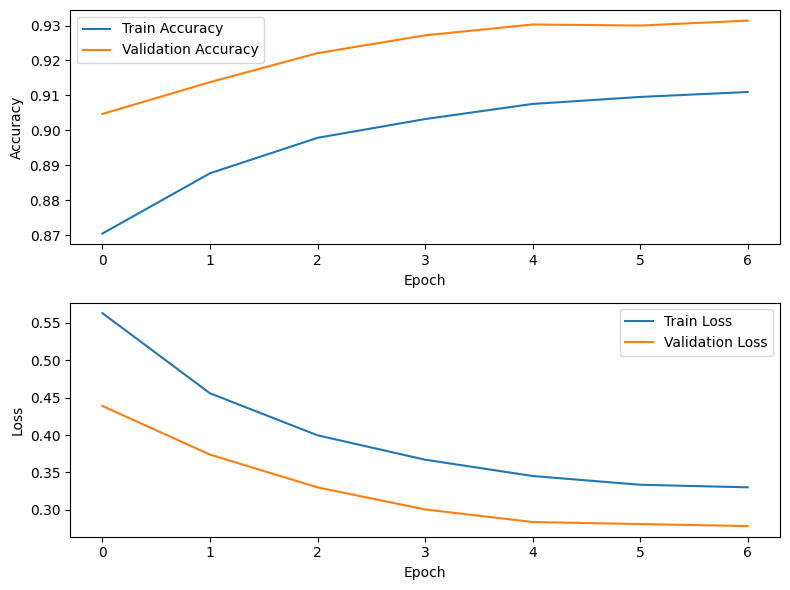

In [ ]:
AG.show_statics_training(statics, save_to + 'base model fine tuning for extra itr')
torch.save(model_base, model_path)

In [ ]:
AG.evaluation_2(model_base , nn.CrossEntropyLoss())

Accuracy: 93.14%
Loss: 0.2781


(0.9314, 0.27810352926800963)

### Itérations supplémentaires (3 & 4 & 5)

In [ ]:
itr = 2
nb_itr = 5
kd_epoch = 8
path  = save_to + 'kd/'
files = os.listdir(path)
population = []
for file_ in files:
  if( '(itr-2)' in file_):
    indiv = torch.load(path+file_)
    population.append(indiv)
path  = save_to + 'parents/'
files = os.listdir(path)
for file_ in files:
  if( '(itr-2)' in file_):
    indiv = torch.load(path+file_)
    population.append(indiv)

In [ ]:
len(population)

8

/*-----------------------------*/
/*         iteration 3        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
       - mutation:
       - Crossover:
           mask : [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
       - mutation:
     

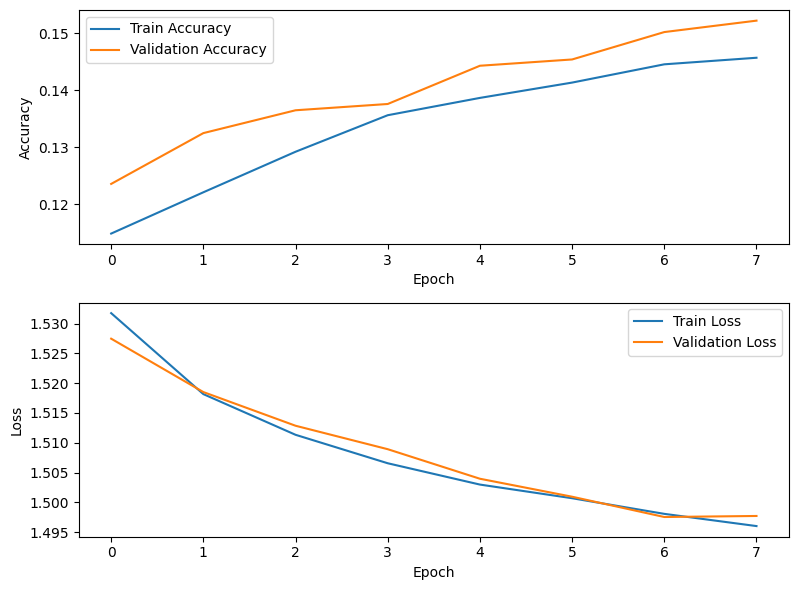

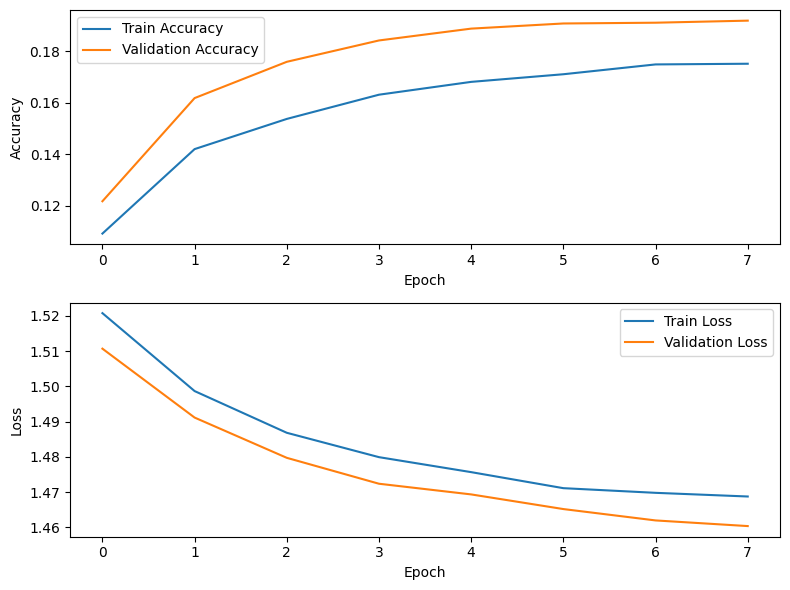

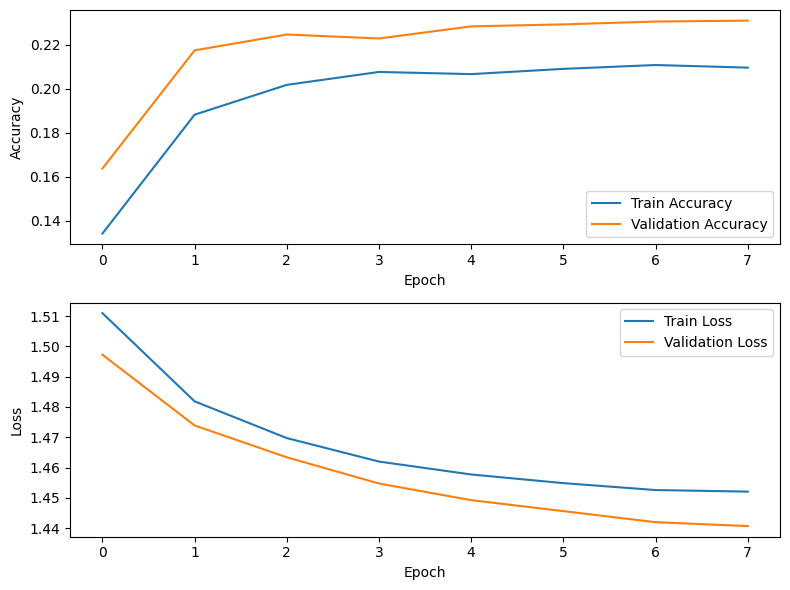

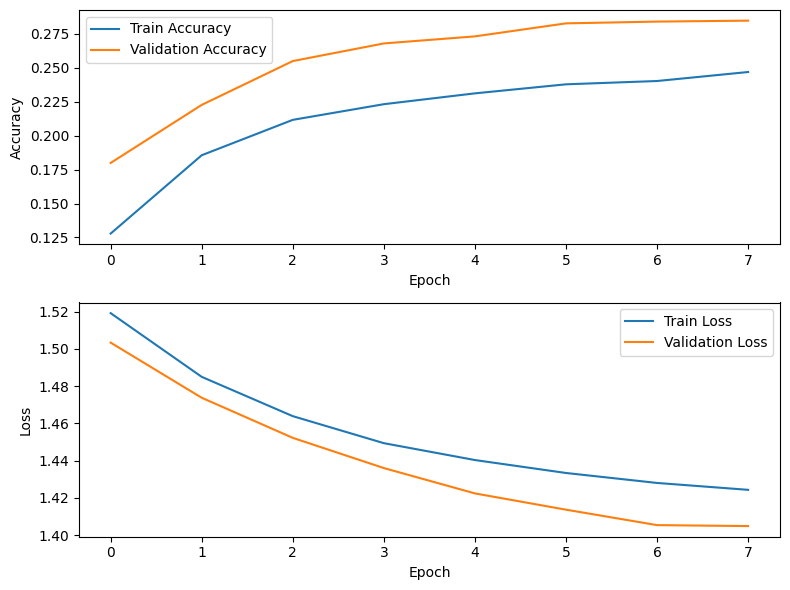

/*-----------------------------*/
/*         iteration 4        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]
       - mutation:
       - Crossover:
           mask : [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]
       - Performing KD o

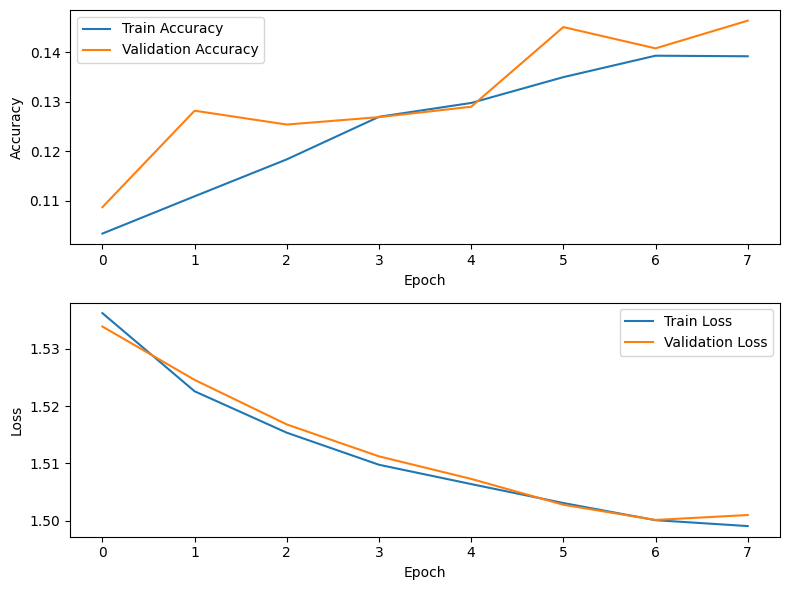

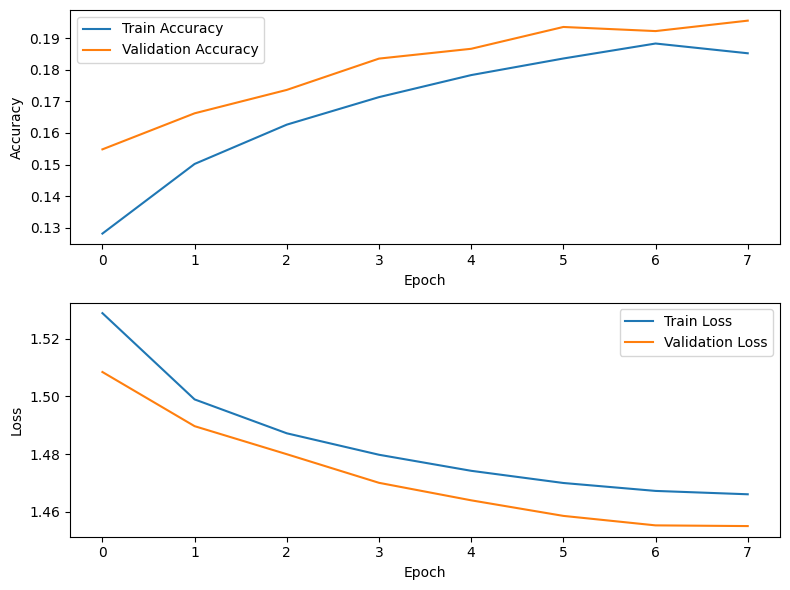

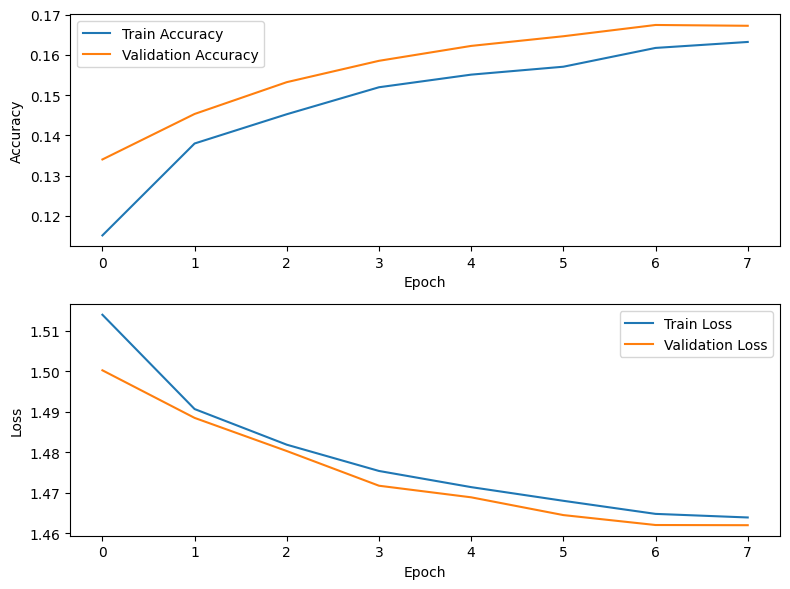

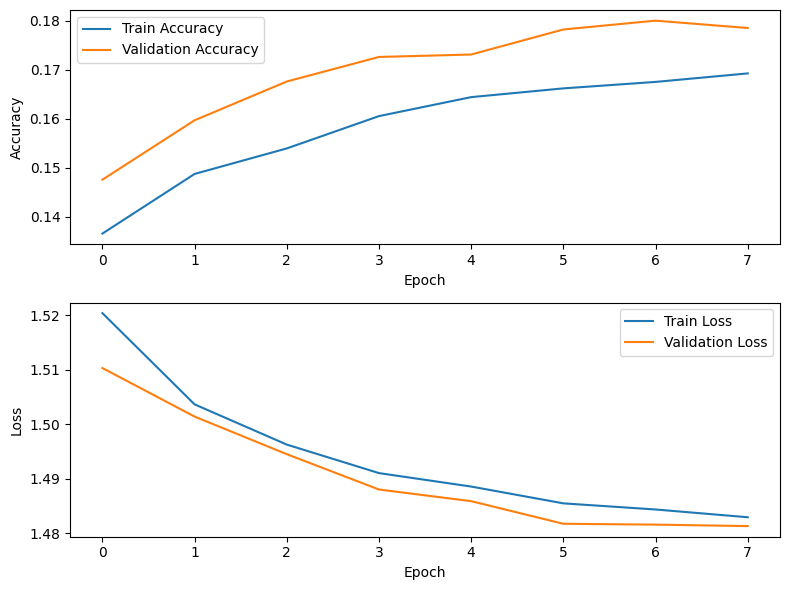

/*-----------------------------*/
/*         iteration 5        */
/*----------------------------*/
   * Select parent for crossing:
       - Selection --------------- 100%
   * Offspring:
       - Crossover:
           mask : [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
       - mutation:
       - Crossover:
           mask : [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
       - Performing KD o

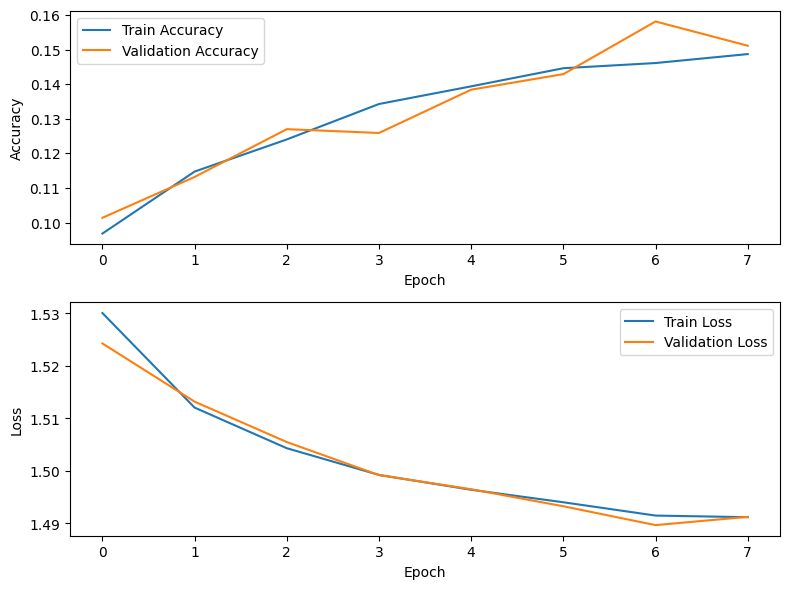

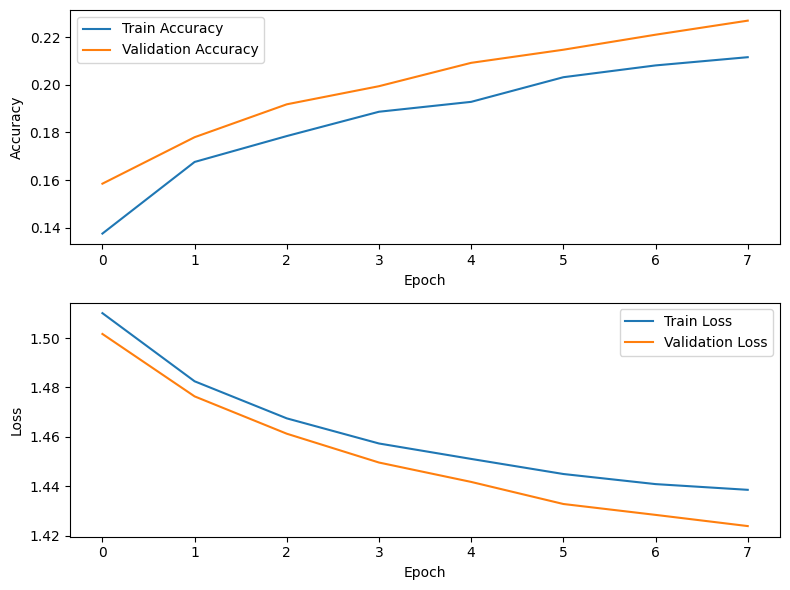

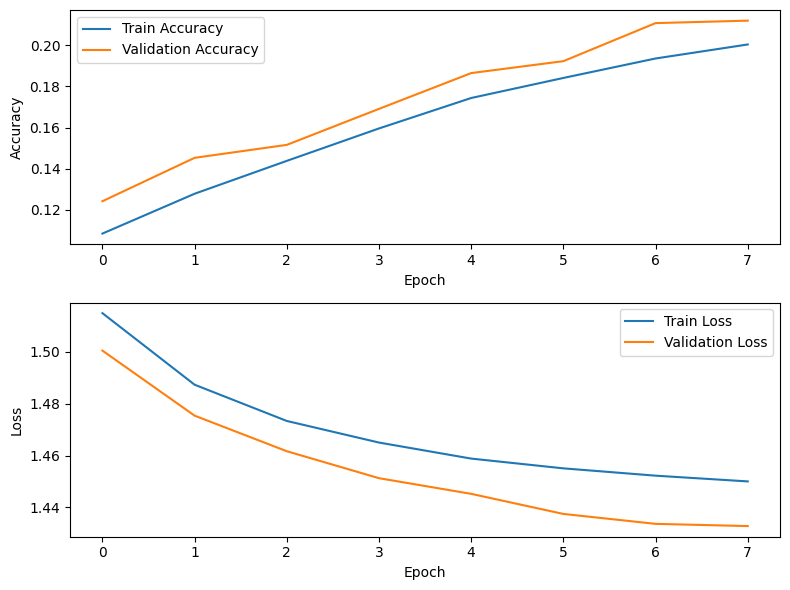

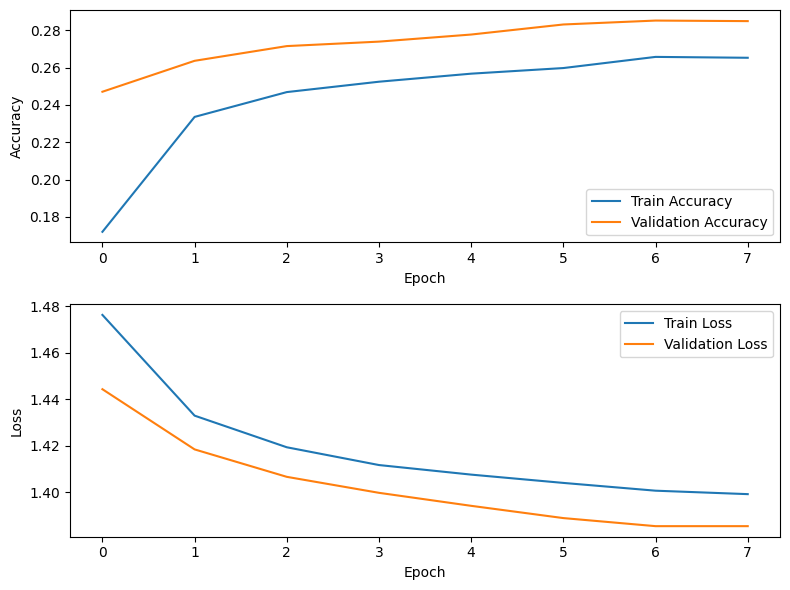

Select the winning ticket from final population
  - Selection --------------- 100%


In [ ]:
winning_ticket = AG.AG_extra_itr(model_base,population, save_to, itr,nb_itr,kd_epoch)

### Évaluer le ticket gagnant

In [ ]:
winning_ticket = torch.load( save_to + 'winning_ticket')

In [ ]:
AG.calculate_sparsity(winning_ticket)

tensor(0.8437, device='cuda:0')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 28.53%
Loss: 1.9987


(0.2853, 1.9987219237977532)

In [ ]:
data = AG.dataloaders['val']
for in_ , lbl in data:
  in_ = in_.to(AG.device)
  lbl = lbl.to(AG.device)
  out = winning_ticket(in_)
  _, preds = torch.max(out, 1)
  print(preds)
  print('-'*10)
  print(lbl)
  print('-'*10)
  print(preds-lbl)
  break

tensor([2, 7, 7, 6, 6, 7, 6, 3, 3, 2, 6, 2, 2, 2, 9, 6, 2, 7, 2, 2, 9, 3, 6, 7,
        7, 9, 7, 2, 6, 2, 6, 2, 3, 3, 2, 7, 3, 2, 2, 2, 3, 2, 6, 6, 3, 3, 7, 6,
        7, 7, 6, 6, 6, 9, 9, 7, 2, 7, 6, 6, 6, 2, 6, 9], device='cuda:0')
----------
tensor([2, 7, 9, 1, 1, 7, 0, 8, 3, 7, 6, 3, 5, 0, 4, 6, 4, 7, 4, 8, 3, 3, 2, 9,
        7, 9, 7, 6, 0, 3, 2, 6, 8, 8, 6, 9, 4, 2, 8, 8, 8, 5, 6, 8, 8, 8, 7, 1,
        4, 9, 4, 8, 6, 7, 6, 7, 4, 9, 1, 1, 0, 0, 6, 3], device='cuda:0')
----------
tensor([ 0,  0, -2,  5,  5,  0,  6, -5,  0, -5,  0, -1, -3,  2,  5,  0, -2,  0,
        -2, -6,  6,  0,  4, -2,  0,  0,  0, -4,  6, -1,  4, -4, -5, -5, -4, -2,
        -1,  0, -6, -6, -5, -3,  0, -2, -5, -5,  0,  5,  3, -2,  2, -2,  0,  2,
         3,  0, -2, -2,  5,  5,  6,  2,  0,  6], device='cuda:0')


### Effectuer la distillation des connaissances pendant des epochs supplémentaires

------------------------------ Training ---------------------------------
Epoch 0/34
----------
train Loss: 1.3981 Acc: 0.2694
val Loss: 1.3828 Acc: 0.2866

Epoch 1/34
----------
train Loss: 1.3967 Acc: 0.2730
val Loss: 1.3768 Acc: 0.2917

Epoch 2/34
----------
train Loss: 1.3942 Acc: 0.2744
val Loss: 1.3759 Acc: 0.2911

Epoch 3/34
----------
train Loss: 1.3935 Acc: 0.2766
val Loss: 1.3737 Acc: 0.2955

Epoch 4/34
----------
train Loss: 1.3920 Acc: 0.2823
val Loss: 1.3711 Acc: 0.3002

Epoch 5/34
----------
train Loss: 1.3910 Acc: 0.2813
val Loss: 1.3717 Acc: 0.3032

Epoch 6/34
----------
train Loss: 1.3910 Acc: 0.2825
val Loss: 1.3700 Acc: 0.3098

Epoch 7/34
----------
train Loss: 1.3907 Acc: 0.2848
val Loss: 1.3646 Acc: 0.3151

Epoch 8/34
----------
train Loss: 1.3896 Acc: 0.2870
val Loss: 1.3656 Acc: 0.3139

Epoch 9/34
----------
train Loss: 1.3894 Acc: 0.2845
val Loss: 1.3639 Acc: 0.3129

Epoch 10/34
----------
train Loss: 1.3880 Acc: 0.2890
val Loss: 1.3639 Acc: 0.3132

Epoch 11/34


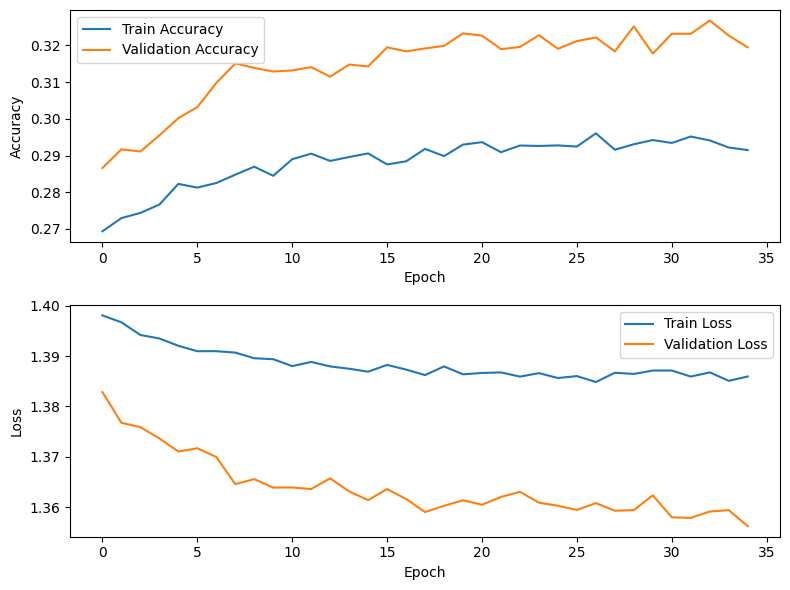

In [ ]:
criterion = AG.SoftHardTargetLoss(global_param.soft_citerion,global_param.hard_citerion, global_param.soft_purcntg, global_param.hard_purcntg)

optimizer_conv =  optim.SGD(winning_ticket.parameters(), lr=0.01, momentum=0.9)

exp_lr_scheduler =  lr_scheduler.StepLR(optimizer_conv, step_size=9, gamma=0.5)

print("------------------------------ Training ---------------------------------")
# Train the model
winning_ticket, statics = AG.train_model_kd_mix(winning_ticket,model_base, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=35)
AG.show_statics_training(statics, save_to + 'winning_ticket')
torch.save(winning_ticket, save_to + 'winning_ticket')

In [ ]:
AG.evaluation_2(winning_ticket, nn.CrossEntropyLoss())

Accuracy: 32.68%
Loss: 1.9292


(0.3268, 1.9291878270495468)